# Discretisation automatique supervisées des variables continues


---------------------------------------------------------------------------

Discrétisation de X en 3 classes (algorithme Nelder-Mead)

---------------------------------------------------------------------------


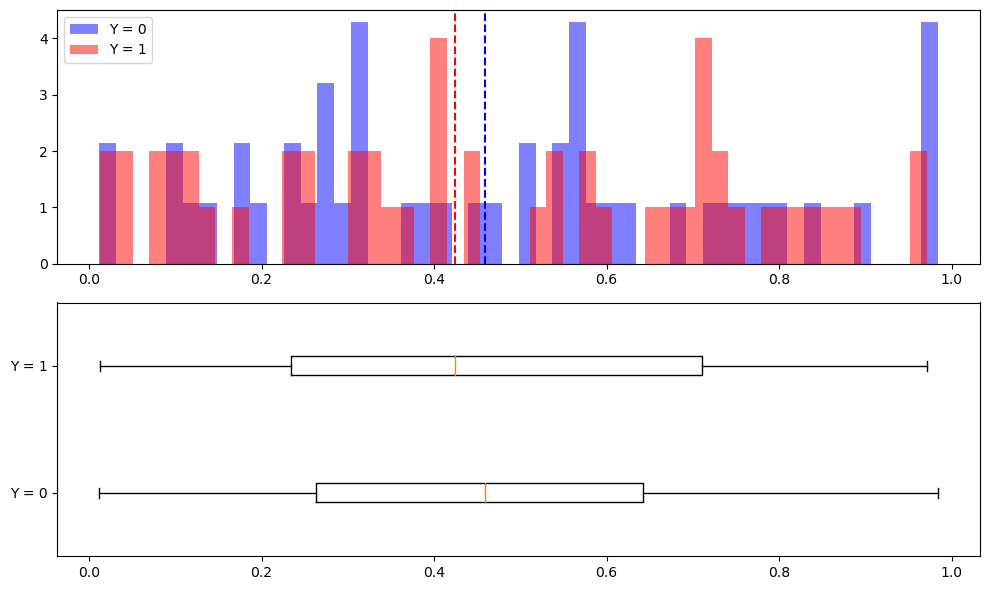

In [5]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.stats import kruskal

def decoup(base, x_col, y_col, h=0, k=0, pAUC=0, nbmod=3, calcul=1, algo='Nelder-Mead', graphe=0):
    
    def fitauc(s):
        s2 = np.concatenate([[-np.inf], np.unique(s), [np.inf]])
        qX = pd.cut(base_x_no_na, s2, labels=False)
        qX_dummies = pd.get_dummies(qX)
        logit = LogisticRegression(max_iter=1000).fit(qX_dummies, base_y_no_na)
        qXn = logit.predict_proba(qX_dummies)[:, 1]
        
        auc_value = roc_auc_score(base_y_no_na, qXn) * \
                    (1 - sum((np.bincount(qX) / len(base_x_no_na))**2)) / \
                    (1 - (1-h) * sum((np.bincount(qX) / len(base_x_no_na))**2)) * \
                    (1 - (1-k) * sum((qX_dummies.mean()**2))) / (1 - sum(qX_dummies.mean()**2))
        
        return -auc_value
    
    base_x = base[x_col]
    base_y = base[y_col]
    
    base_x_no_na = base_x.dropna().values
    base_y_no_na = base_y[base_x.notna()].values
    
    seuils = np.percentile(base_x_no_na, np.linspace(0, 100, nbmod+1))[1:-1]
    
    if calcul == 1:
        result = minimize(fitauc, seuils, method=algo)
        est = result.x
    else:
        raise NotImplementedError("The 'else' part of 'calcul' is not implemented.")
    
    s_final = np.concatenate([[-np.inf], np.unique(est), [np.inf]])
    qX1 = pd.cut(base_x, s_final, labels=False)
    
    print("\n---------------------------------------------------------------------------")
    print(f"\nDiscrétisation de {x_col} en {nbmod} classes (algorithme {algo})")
    print("\n---------------------------------------------------------------------------")
        
    if graphe == 1:
        base0 = base_x_no_na[base_y_no_na == 0]
        base1 = base_x_no_na[base_y_no_na == 1]
        
        plt.figure(figsize=(10, 6))
        
        plt.subplot(2, 1, 1)
        plt.hist(base0, bins=50, density=True, alpha=0.5, color="blue", label=f"{y_col} = 0")
        plt.hist(base1, bins=50, density=True, alpha=0.5, color="red", label=f"{y_col} = 1")
        plt.axvline(np.median(base0), color="blue", linestyle="--")
        plt.axvline(np.median(base1), color="red", linestyle="--")
        plt.legend()
        
        plt.subplot(2, 1, 2)
        plt.boxplot([base0, base1], vert=False)
        plt.yticks([1, 2], [f"{y_col} = 0", f"{y_col} = 1"])
        
        plt.tight_layout()
        plt.show()

    return qX1

df = pd.DataFrame({
    'X': np.random.rand(100),
    'Y': np.random.choice([0, 1], 100)
})

qX_result = decoup(df, 'X', 'Y', nbmod=3, graphe=1)



---------------------------------------------------------------------------

Discrétisation de age en 2 classes (algorithme Nelder-Mead)

---------------------------------------------------------------------------


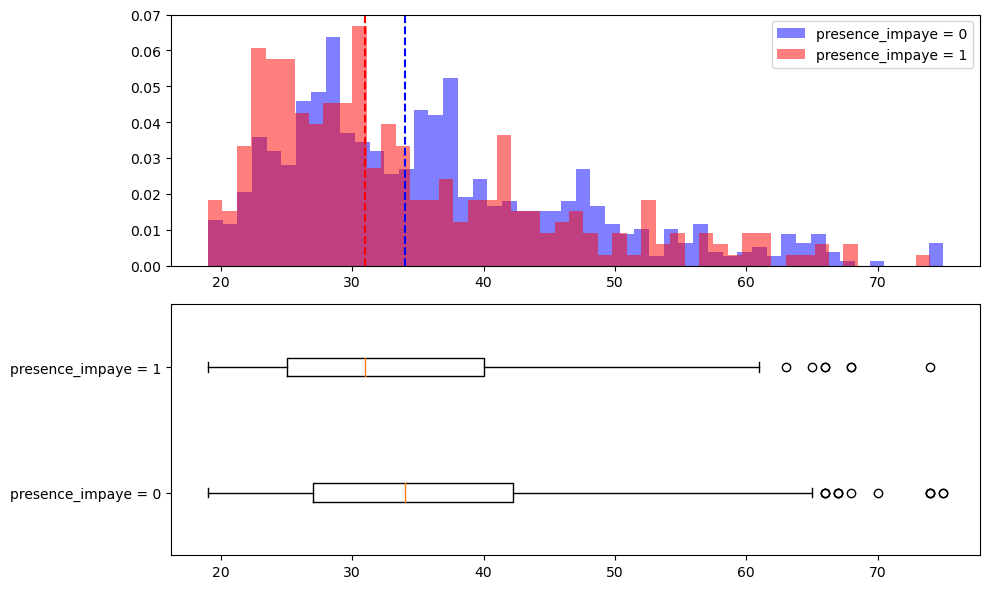


---------------------------------------------------------------------------

Discrétisation de age en 3 classes (algorithme Nelder-Mead)

---------------------------------------------------------------------------


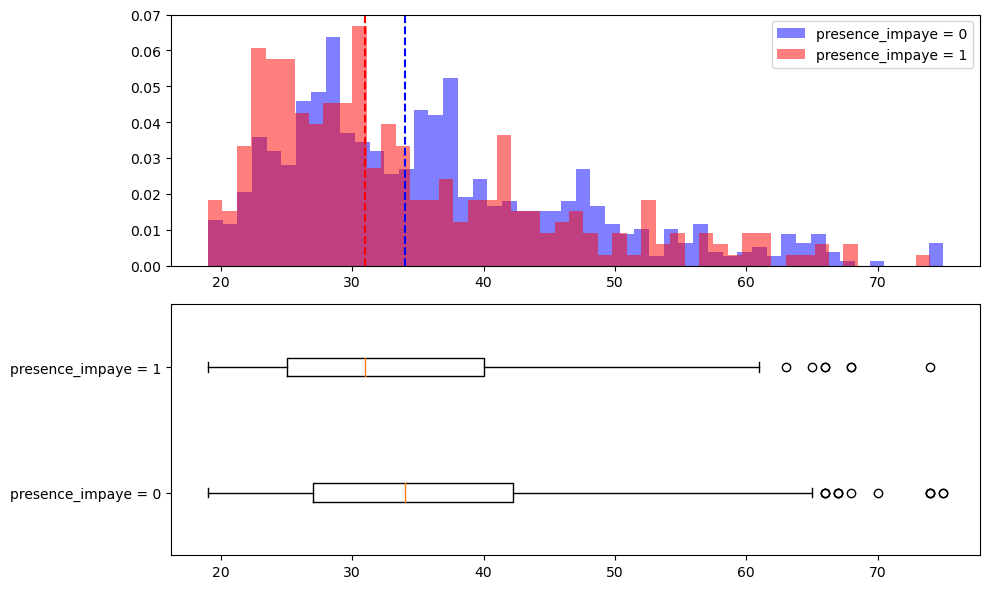


---------------------------------------------------------------------------

Discrétisation de age en 4 classes (algorithme Nelder-Mead)

---------------------------------------------------------------------------


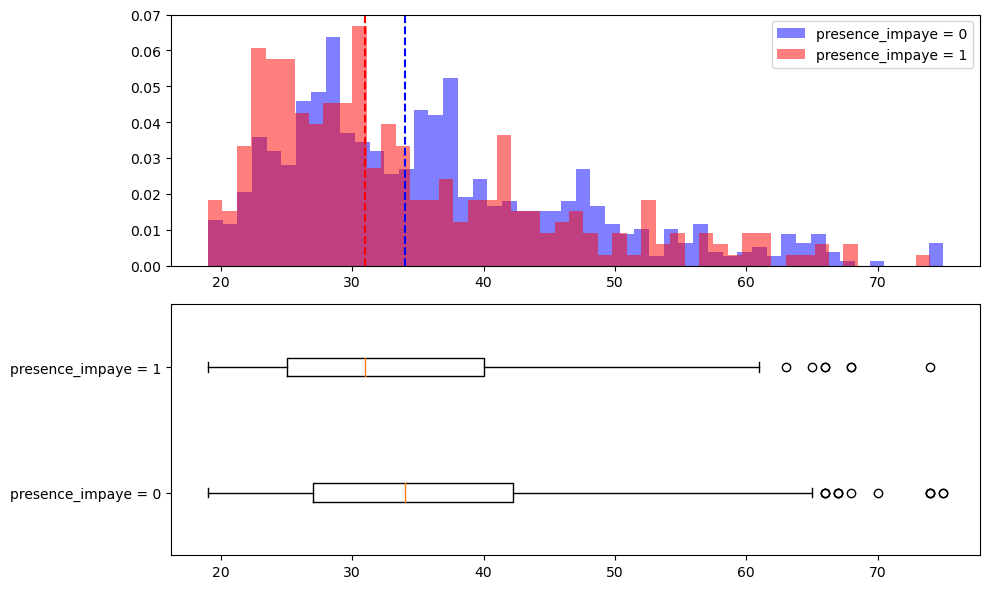


---------------------------------------------------------------------------

Discrétisation de age en 5 classes (algorithme Nelder-Mead)

---------------------------------------------------------------------------


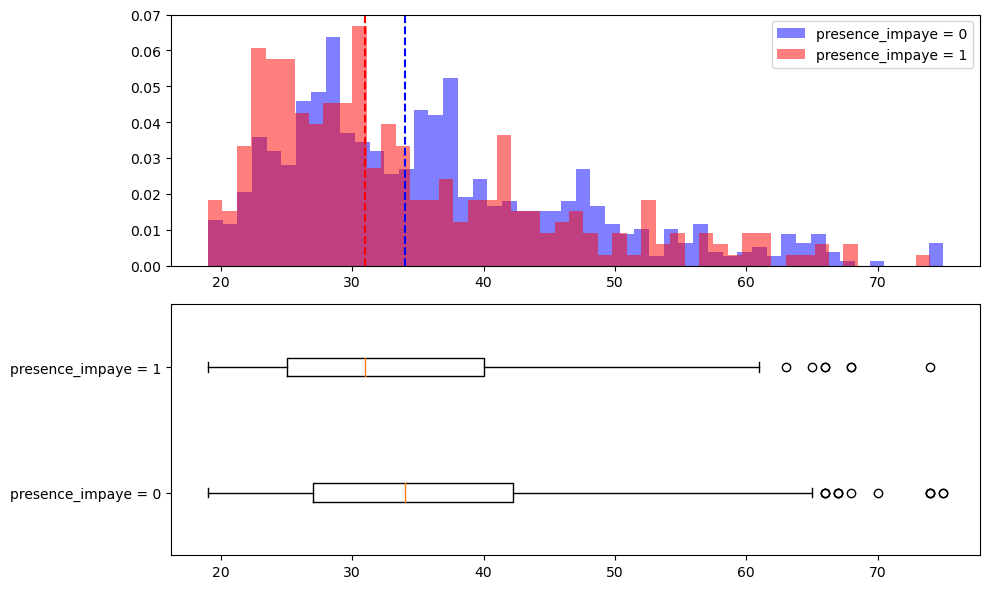

In [6]:
credit = pd.read_csv('credit.csv') 

for i in range(2, 6): 
    qX_result = decoup(credit, 'age', 'presence_impaye', nbmod=i, h=0, k=0, pAUC=0.8, graphe=1)


---------------------------------------------------------------------------

Discrétisation de duree_credit en 2 classes (algorithme Nelder-Mead)

---------------------------------------------------------------------------


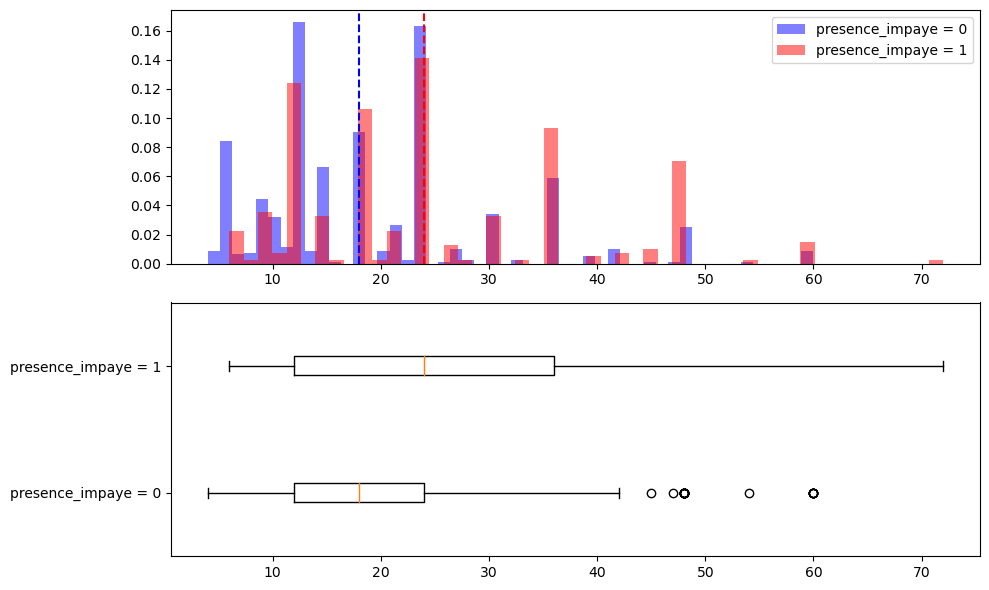


---------------------------------------------------------------------------

Discrétisation de duree_credit en 3 classes (algorithme Nelder-Mead)

---------------------------------------------------------------------------


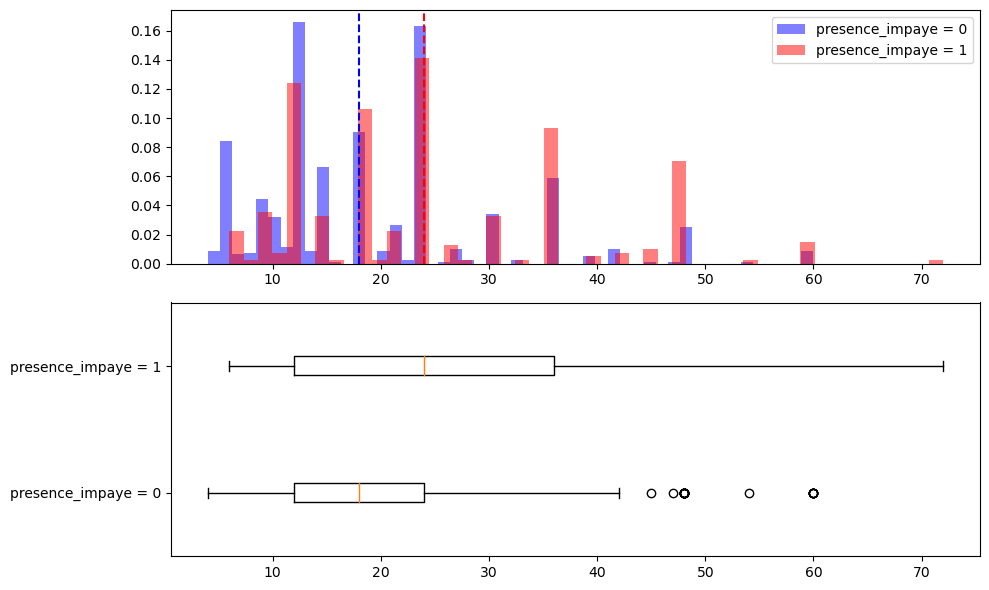


---------------------------------------------------------------------------

Discrétisation de duree_credit en 4 classes (algorithme Nelder-Mead)

---------------------------------------------------------------------------


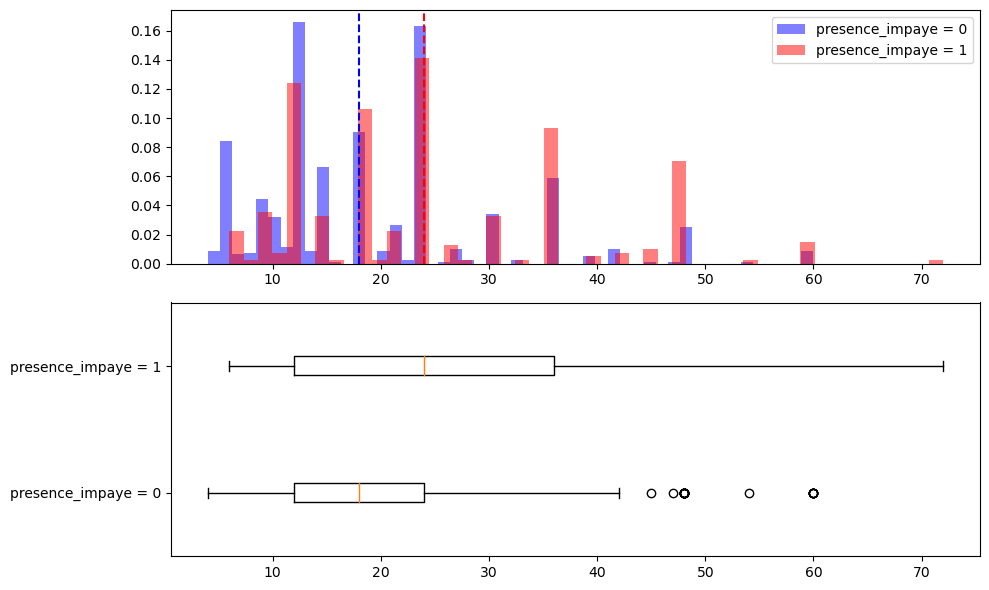


---------------------------------------------------------------------------

Discrétisation de duree_credit en 5 classes (algorithme Nelder-Mead)

---------------------------------------------------------------------------


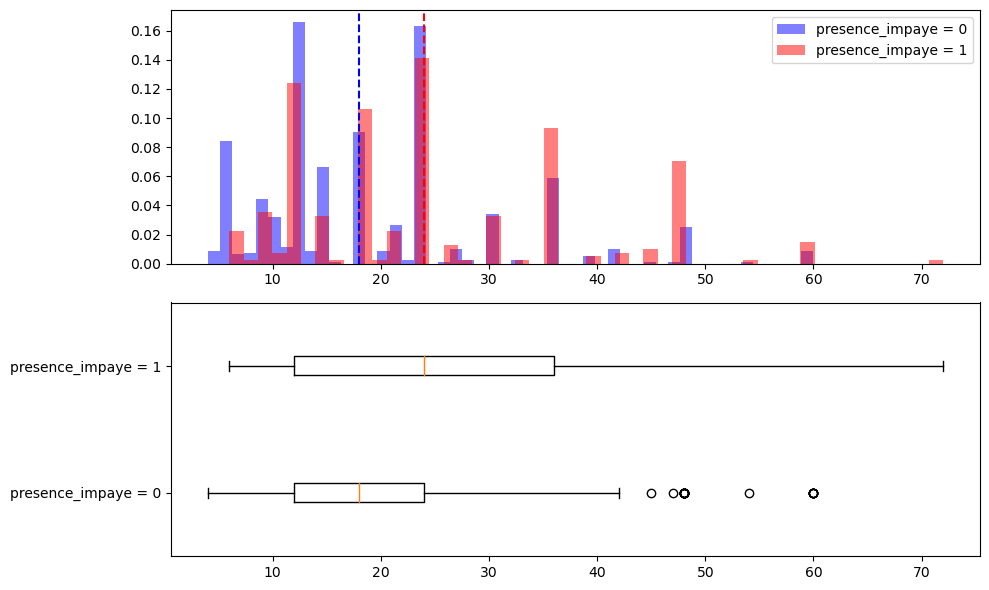

In [7]:
for i in range(2, 6):  
    qX_result = decoup(credit, 'duree_credit', 'presence_impaye', nbmod=i, h=0, k=0, pAUC=0.8, graphe=1)


---------------------------------------------------------------------------

Discrétisation de montant_credit en 2 classes (algorithme Nelder-Mead)

---------------------------------------------------------------------------


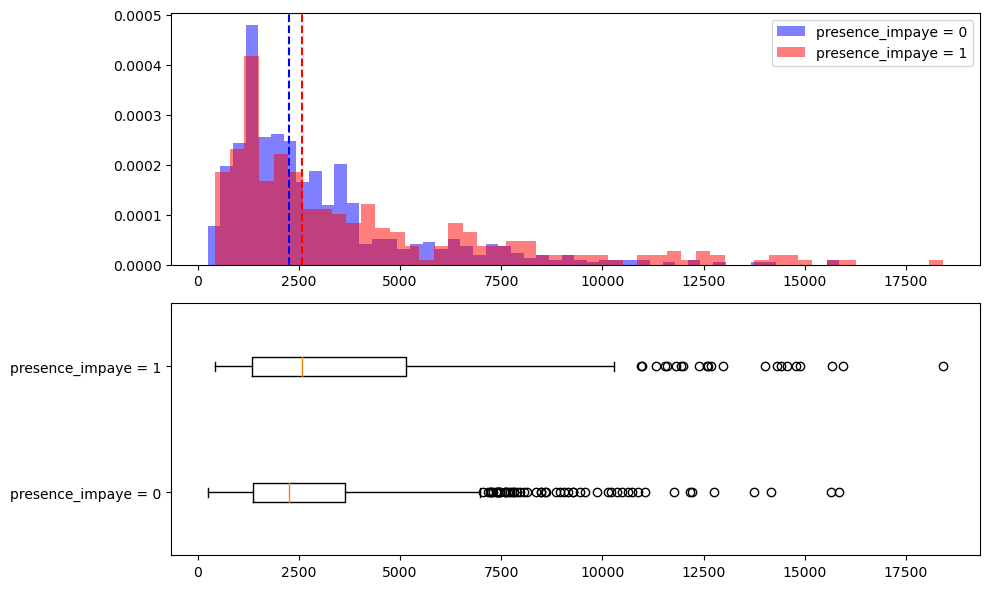


---------------------------------------------------------------------------

Discrétisation de montant_credit en 3 classes (algorithme Nelder-Mead)

---------------------------------------------------------------------------


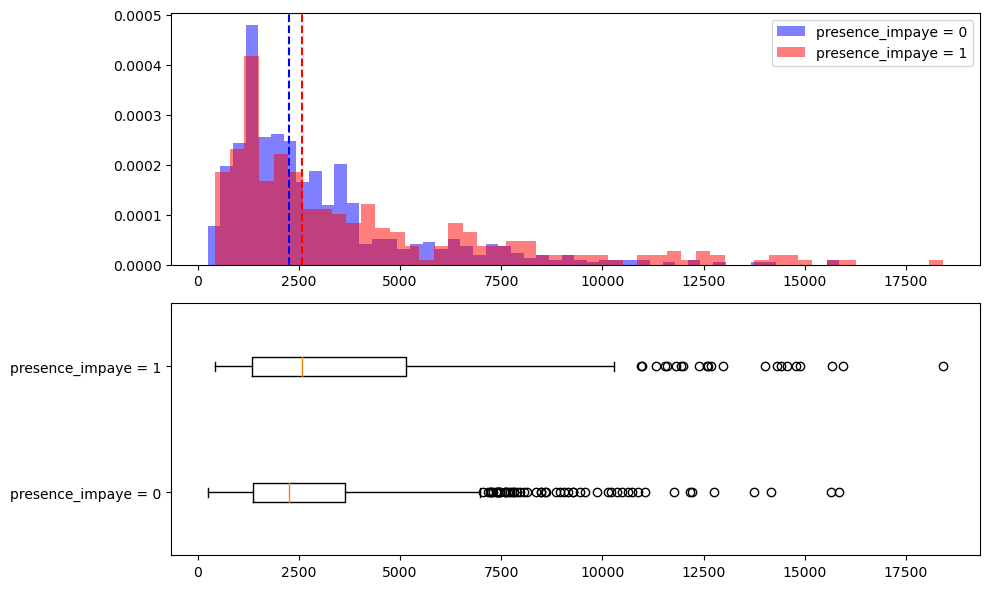


---------------------------------------------------------------------------

Discrétisation de montant_credit en 4 classes (algorithme Nelder-Mead)

---------------------------------------------------------------------------


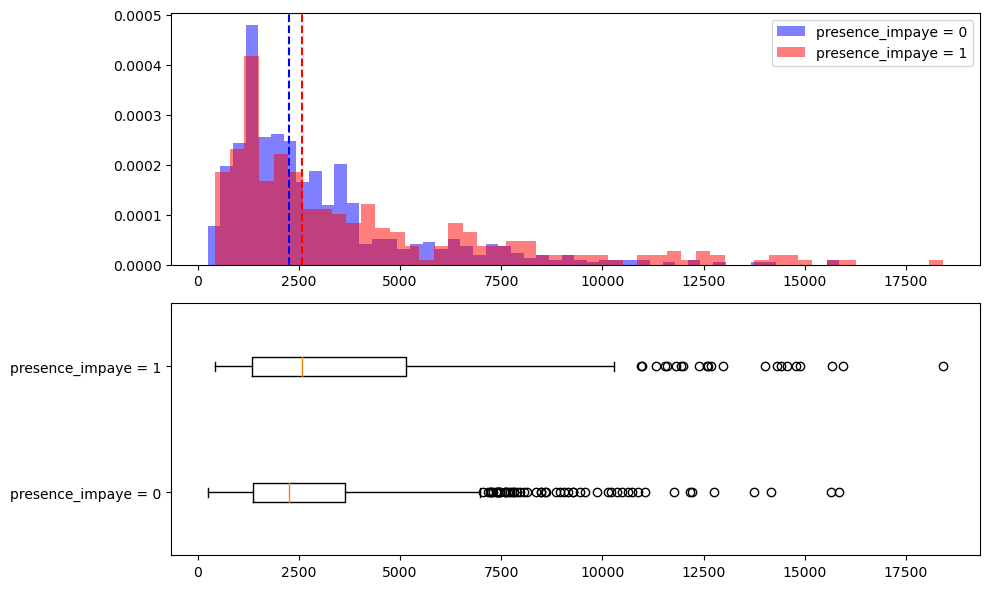


---------------------------------------------------------------------------

Discrétisation de montant_credit en 5 classes (algorithme Nelder-Mead)

---------------------------------------------------------------------------


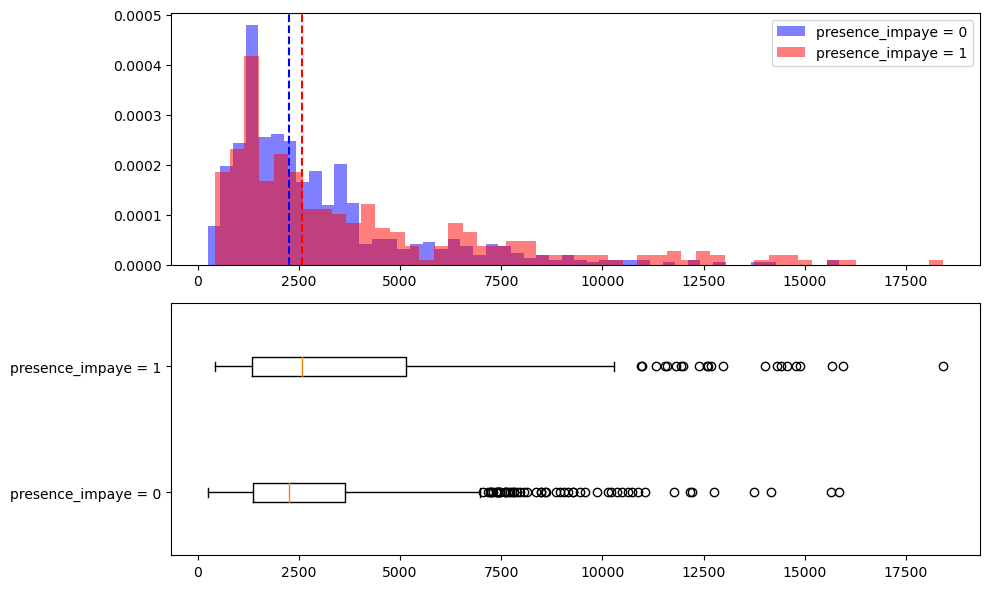

In [8]:
for i in range(2, 6):  
    qX_result = decoup(credit, 'montant_credit', 'presence_impaye', nbmod=i, h=0, k=0, pAUC=0.8, graphe=1)